 # About dataset
 Dataset asuransi kesehatan berisi informasi tentang sejumlah faktor yang dapat memengaruhi biaya medis, termasuk usia, jenis kelamin, IMT, status merokok, jumlah anak, dan wilayah. Dataset ini dapat digunakan untuk melatih model pembelajaran mesin yang dapat memprediksi biaya medis untuk pelanggan baru.

Untuk memberikan wawasan mengenai faktor-faktor utama yang menyebabkan biaya asuransi lebih tinggi dan membantu perusahaan membuat keputusan yang lebih tepat mengenai penetapan harga dan penilaian risiko.

- Age: Usia
- Sex : Jenis kelamin
- BMI (Body Mass Index)
- Children : Jumlah anak
- Smoker : Apakah pasien merokok? (yes/no)
- region: Wilayah
- Charges: Biaya

Pernyataan Masalah:

- Apa faktor terpenting yang memengaruhi biaya pengobatan?
- Seberapa baik model pembelajaran mesin dapat memprediksi biaya medis?
- Bagaimana model pembelajaran mesin dapat digunakan untuk meningkatkan efisiensi dan profitabilitas perusahaan asuransi kesehatan?

In [73]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [74]:
# api = KaggleApi()
# api.authenticate()

# data_name = 'harishkumardatalab/medical-insurance-price-prediction'
# api.dataset_download_files(data_name, path='./data', unzip=True)

In [75]:
insurance = pd.read_csv('./data/Medical_insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


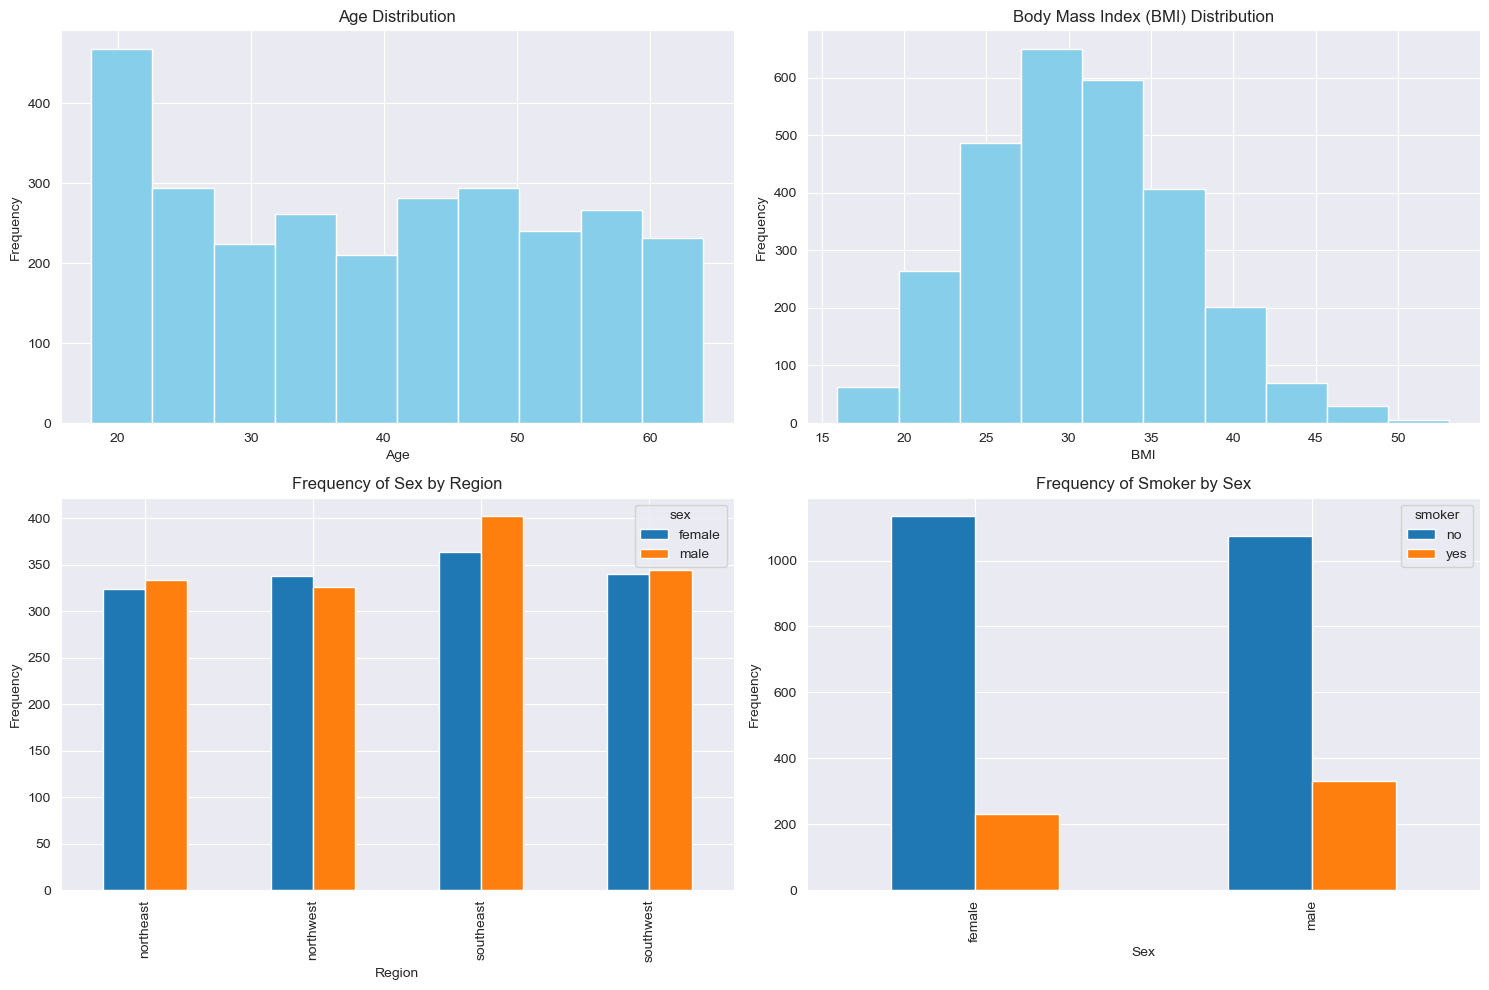

In [77]:
groupby_region = insurance.groupby('region')['sex'].value_counts().unstack()
groupby_sex = insurance.groupby('sex')['smoker'].value_counts().unstack()
# groupby_regionC = insurance.groupby('region')['children'].count()


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].hist(insurance['age'], bins=10, color='skyblue')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlabel('Age')

axs[0, 1].hist(insurance['bmi'], bins=10, color='skyblue')
axs[0, 1].set_title('Body Mass Index (BMI) Distribution')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xlabel('BMI')

groupby_region.plot(kind='bar',ax=axs[1, 0])
axs[1, 0].set_title('Frequency of Sex by Region')
axs[1, 0].set_xlabel('Region')
axs[1, 0].set_ylabel('Frequency')

groupby_sex.plot(kind='bar',ax=axs[1, 1])
axs[1, 1].set_title('Frequency of Smoker by Sex')
axs[1, 1].set_xlabel('Sex')
axs[1, 1].set_ylabel('Frequency')

# groupby_regionC.plot(kind='bar',ax=axs[1, 2])
# axs[1, 2].set_title('Frequency of Smoker by Children')
# axs[1, 2].set_xlabel('Sex')
# axs[1, 2].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

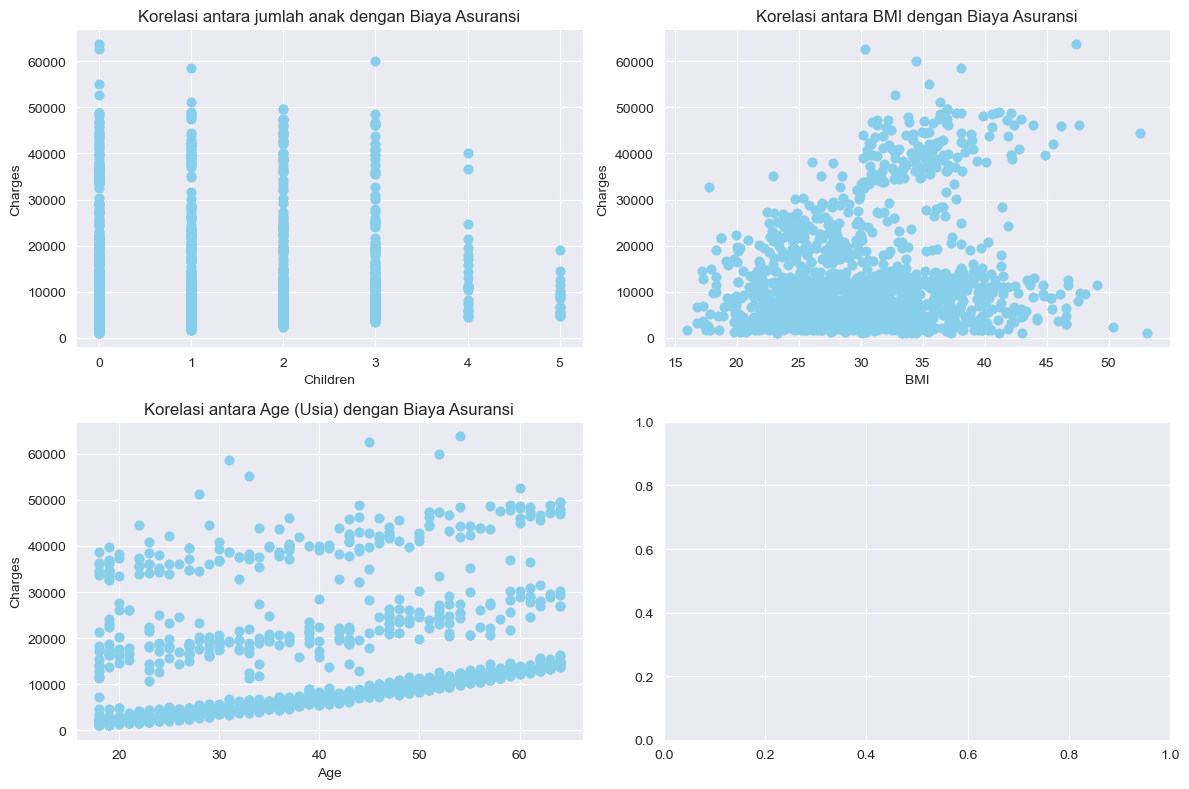

In [78]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(x=insurance['children'], y=insurance['charges'], color='skyblue')
axs[0, 0].set_title('Korelasi antara jumlah anak dengan Biaya Asuransi')
axs[0, 0].set_ylabel('Charges')
axs[0, 0].set_xlabel('Children')

axs[0, 1].scatter(x=insurance['bmi'], y=insurance['charges'], color='skyblue')
axs[0, 1].set_title('Korelasi antara BMI dengan Biaya Asuransi')
axs[0, 1].set_xlabel('BMI')
axs[0, 1].set_ylabel('Charges')

axs[1, 0].scatter(x=insurance['age'], y=insurance['charges'], color='skyblue')
axs[1, 0].set_title('Korelasi antara Age (Usia) dengan Biaya Asuransi')
axs[1, 0].set_ylabel('Charges')
axs[1, 0].set_xlabel('Age')

plt.tight_layout()
plt.show()

In [79]:
num_cols = insurance.select_dtypes(exclude='object').columns.tolist()
insurance[num_cols].corr()

,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


# Feature Engineering

In [80]:
def cat_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Healthy weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'
    
insurance['bmi_category'] = insurance['bmi'].apply(cat_bmi)

In [81]:
insurance[['bmi', 'bmi_category']]

,bmi,bmi_category
0,27.900,Overweight
1,33.770,Obesity
2,33.000,Obesity
3,22.705,Healthy weight
4,28.880,Overweight
...,...,...
2767,45.320,Obesity
2768,34.600,Obesity
2769,26.030,Overweight
2770,18.715,Healthy weight


In [82]:
def create_risk_levels(df):
    df = df.copy()
    
    # Risk level 0-3
    conditions = [
        (df['smoker'] == 'yes') & (df['bmi'] > 30),  # Level 3: Sangat tinggi
        (df['smoker'] == 'yes') & (df['bmi'] <= 30), # Level 2: Tinggi
        (df['smoker'] == 'no') & (df['bmi'] > 30),  # Level 1: Sedang
        (df['smoker'] == 'no') & (df['bmi'] <= 30)  # Level 0: Rendah
    ]
    
    levels = [3, 2, 1, 0]
    
    df['risk_level'] = np.select(conditions, levels, default=0)
    
    return df

insurance = create_risk_levels(insurance)

In [83]:
insurance

,age,sex,bmi,children,smoker,region,charges,bmi_category,risk_level
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,2
1,18,male,33.770,1,no,southeast,1725.55230,Obesity,1
2,28,male,33.000,3,no,southeast,4449.46200,Obesity,1
3,33,male,22.705,0,no,northwest,21984.47061,Healthy weight,0
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,0
...,...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,Obesity,1
2768,21,female,34.600,0,no,southwest,2020.17700,Obesity,1
2769,19,male,26.030,1,yes,northwest,16450.89470,Overweight,2
2770,23,male,18.715,0,no,northwest,21595.38229,Healthy weight,0


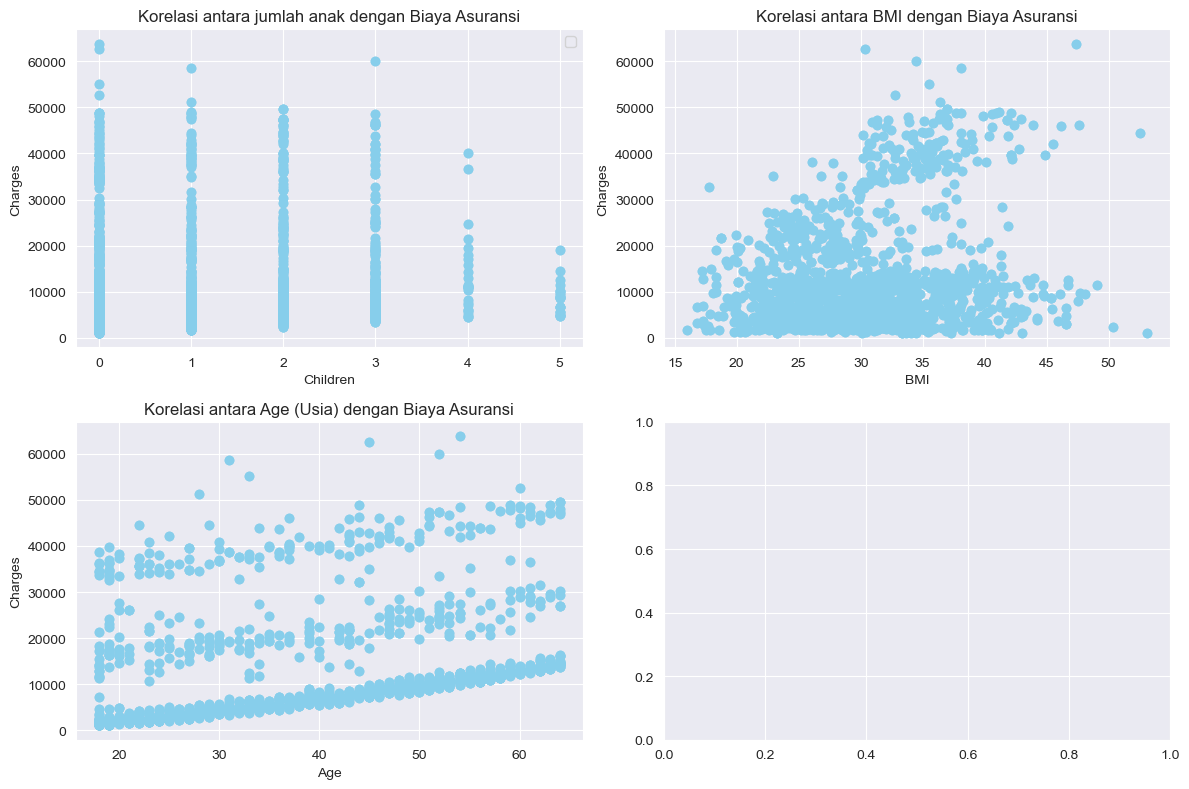

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(x=insurance['children'], y=insurance['charges'], color='skyblue')
axs[0, 0].legend()
axs[0, 0].set_title('Korelasi antara jumlah anak dengan Biaya Asuransi')
axs[0, 0].set_ylabel('Charges')
axs[0, 0].set_xlabel('Children')

axs[0, 1].scatter(x=insurance['bmi'], y=insurance['charges'], color='skyblue')
axs[0, 1].set_title('Korelasi antara BMI dengan Biaya Asuransi')
axs[0, 1].set_xlabel('BMI')
axs[0, 1].set_ylabel('Charges')

axs[1, 0].scatter(x=insurance['age'], y=insurance['charges'], color='skyblue')
axs[1, 0].set_title('Korelasi antara Age (Usia) dengan Biaya Asuransi')
axs[1, 0].set_ylabel('Charges')
axs[1, 0].set_xlabel('Age')

plt.tight_layout()
plt.show()

# Preprocessing

In [85]:
insurance['smoker'] = insurance['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [86]:
insurance.isna().sum()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
bmi_category    0
risk_level      0
dtype: int64

In [87]:
insurance.duplicated().sum()

1435

In [88]:
insurance.drop_duplicates(inplace=True)

In [89]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [90]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
xtest['smoker']

900     0
1064    0
1256    0
298     1
237     0
       ..
534     0
542     0
760     0
1284    1
1285    0
Name: smoker, Length: 268, dtype: int64

In [92]:
cat_cols = xtrain.select_dtypes(include='object').columns.tolist()
num_cols = xtrain.select_dtypes(exclude=['object']).columns.tolist()
num_cols.remove('smoker')
print(cat_cols)
print(num_cols)

['sex', 'region', 'bmi_category']
['age', 'bmi', 'children', 'risk_level']


In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [94]:
regressor = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

In [95]:
from sklearn.compose import ColumnTransformer
encoder1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler1 = MinMaxScaler()

preprocessor1 = ColumnTransformer(
    transformers=[
        ('cat', encoder1, cat_cols),
        ('num', scaler1, num_cols)
    ],
    remainder='passthrough'
)

xtrain_processed = preprocessor1.fit_transform(xtrain) 
xtest_processed = preprocessor1.transform(xtest)

feature_names = preprocessor1.get_feature_names_out()
xtrain_processed_df = pd.DataFrame(xtrain_processed, columns=feature_names, index=xtrain.index)
xtest_processed_df = pd.DataFrame(xtest_processed, columns=feature_names, index=xtest.index)

<Axes: >

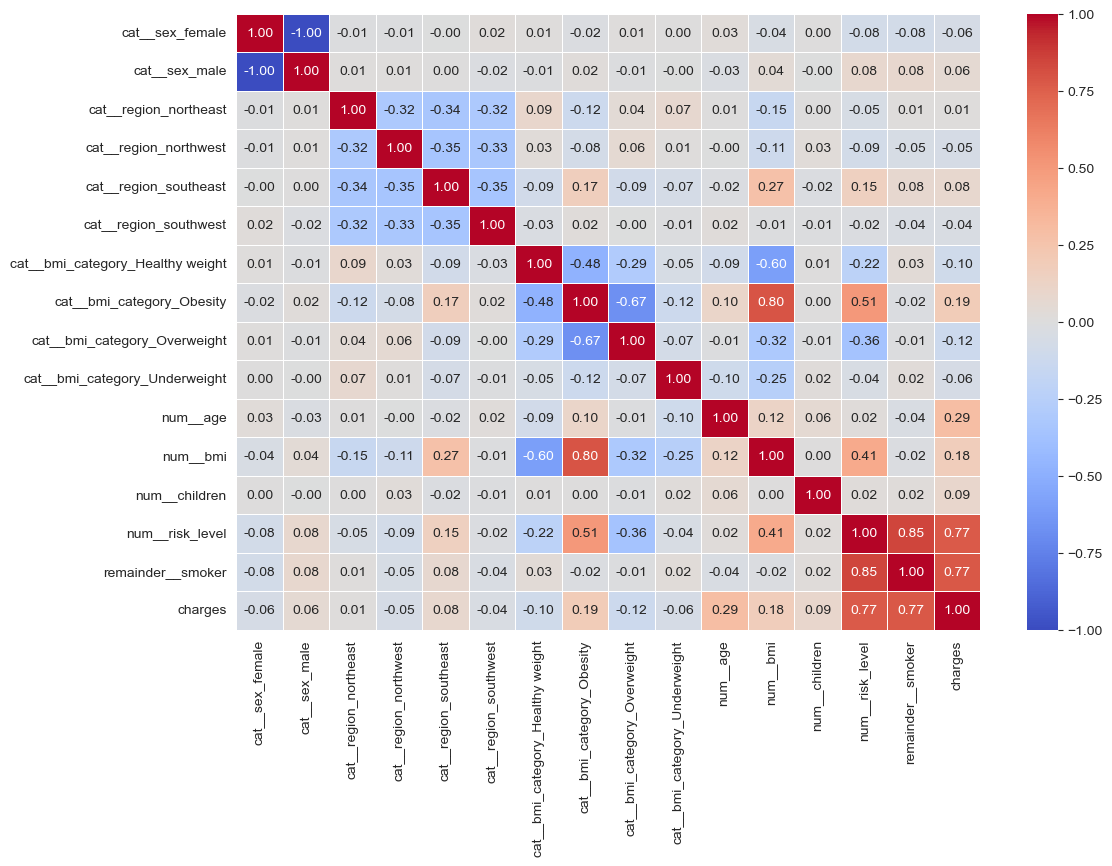

In [ ]:
df_concat = pd.concat([xtrain_processed_df, ytrain], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_concat.corr(), annot=True, linewidths=0.5, fmt='.2f', cmap='coolwarm')

In [96]:
from sklearn.utils import resample
from sklearn.base import clone

# bias variance untuk regression
def bias_variance_regression(model, x, y, n_bootstrap=50):
    n_samples = x.shape[0]
    y_arr = np.asarray(y).ravel()

    preds = np.zeros((n_samples, n_bootstrap), dtype=float)

    for i in range(n_bootstrap):
        x_resample, y_resample = resample(x, y_arr, replace=True, n_samples=n_samples)

        model_clone = clone(model)
        try:
            model_clone.fit(x_resample, y_resample)
        except Exception:
            # fallback: fit pada data penuh jika bootstrap bermasalah
            model_clone = clone(model)
            model_clone.fit(x, y_arr)

        preds[:, i] = model_clone.predict(x)

    # Mean prediction across bootstraps
    y_pred_mean = preds.mean(axis=1)

    # Bias^2: squared difference between mean prediction and true target
    bias2 = np.mean((y_arr - y_pred_mean) ** 2)
    
    # Variance: average variance of predictions across bootstraps
    variance = np.mean(preds.var(axis=1))

    return bias2, variance

# Dictionary untuk menyimpan model yang sudah fit
fitted_models = {}

for name, model in regressor.items():
    model.fit(xtrain_processed, ytrain)

    train_bias2, train_var = bias_variance_regression(model, xtrain_processed, ytrain, n_bootstrap=50)
    train_mse = mean_squared_error(ytrain, model.predict(xtrain_processed))
    train_r2 = r2_score(ytrain, model.predict(xtrain_processed))
    
    # Simpan model fit
    fitted_models[name] = model

    print(f"Model: {name}")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train Bias²: {train_bias2:.4f}")
    print(f"Train Variance: {train_var:.4f}")
    print("-"*50)

Model: Linear Regression
Train MSE: 36034285.9916
Train R²: 0.7368
Train Bias²: 35853679.4570
Train Variance: 536191.2675
--------------------------------------------------
Model: K-Nearest Neighbors
Train MSE: 17789077.9078
Train R²: 0.8701
Train Bias²: 16916758.0809
Train Variance: 5651680.7895
--------------------------------------------------
Model: Decision Tree
Train MSE: 0.0000
Train R²: 1.0000
Train Bias²: 3666487.2293
Train Variance: 12836589.8821
--------------------------------------------------
Model: Support Vector Regressor
Train MSE: 150373983.9771
Train R²: -0.0983
Train Bias²: 150075453.6605
Train Variance: 92504.3835
--------------------------------------------------
Model: Random Forest
Train MSE: 3491551.7831
Train R²: 0.9745
Train Bias²: 6413285.9659
Train Variance: 4476896.9007
--------------------------------------------------
Model: ElasticNet
Train MSE: 84320643.4541
Train R²: 0.3841
Train Bias²: 84611440.8828
Train Variance: 128726.4918
-----------------------

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, cat_cols),
        ('num', scaler, num_cols)
    ],
    remainder='passthrough'
)

# Pipeline lengkap: preprocessing + polynomial (optional) + estimator
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('poly', 'passthrough'),  # Default passthrough, bisa di-override di param
    ('model', KNeighborsRegressor())
])

param_distributions = [
    {
        'poly': [PolynomialFeatures()],
        'poly__degree': [2, 3],
        'poly__interaction_only': [False, True],
        'model': [Ridge()],
        'model__alpha': [0.1, 1.0, 10.0, 100.0]
    },
    
    {
        'poly': [PolynomialFeatures()],
        'poly__degree': [2],
        'poly__interaction_only': [False],
        'model': [Lasso()],
        'model__alpha': [0.01, 0.1, 1.0, 10.0]
    },
    
    {
        'poly': [PolynomialFeatures()],
        'poly__degree': [2],
        'poly__interaction_only': [False, True],
        'model': [LinearRegression()]
    },
    
    {
        'poly': ['passthrough'],
        'model': [KNeighborsRegressor()],
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    },
    
    {
        'poly': ['passthrough'],
        'model': [RandomForestRegressor(random_state=42)],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [10, 15, 20, None],
        'model__min_samples_split': [2, 5, 10]
    },
    
    {
        'poly': ['passthrough'],
        'model': [GradientBoostingRegressor(random_state=42)],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1, 0.15],
        'model__max_depth': [3, 5, 7]
    },
    
    {
        'poly': ['passthrough'],
        'model': [SVR()],
        'model__kernel': ['rbf', 'poly'],
        'model__C': [0.1, 1.0, 10.0],
        'model__epsilon': [0.1, 0.2]
    }
]

rscv = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=50, 
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

rscv.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['sex',
                                                                                'region',
                                                                                'bmi_category']),
                                                                              ('num',
                                                                               MinMaxScaler(),
                                                                               ['age',
                                                                                'bmi',
                                                                                'children',
                                                                                'risk_level'])])),
                                             ('poly', 'passthrough'),
                                             ('model', KNeighborsRegressor())]),
                   n_iter=50,...
                                        {'model': [GradientBoostingRegressor(random_state=42)],
                                         'model__learning_rate': [0.05, 0.1,
                                                                  0.15],
                                         'model__max_depth': [3, 5, 7],
                                         'model__n_estimators': [100, 200],
                                         'poly': ['passthrough']},
                                        {'model': [SVR()],
                                         'model__C': [0.1, 1.0, 10.0],
                                         'model__epsilon': [0.1, 0.2],
                                         'model__kernel': ['rbf', 'poly'],
                                         'poly': ['passthrough']}],
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [98]:
ypred = rscv.predict(xtest)

In [99]:
mae_model = mean_absolute_error(ytest, ypred)
mse_model = mean_squared_error(ytest, ypred)
rmse_model = root_mean_squared_error(ytest, ypred)
r2_model = r2_score(ytest, ypred)

metrics_eval = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Value': [mae_model, mse_model, rmse_model, r2_model]
})
metrics_eval

,Metric,Value
0,MAE,2.316928e+03
1,MSE,1.713361e+07
2,RMSE,4.139277e+03
3,R²,9.067589e-01


In [100]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [101]:
import joblib

joblib.dump(rscv.best_estimator_, './models/best_model.pkl')

['./models/best_model.pkl']